# Machine Learning for Remote Sensing and GIS (GEOG-790-S3)
#### Course Instructor: Dr. Maitiniyazi Maimaitijiang, Department of Geography & Geospatial Sciences, SDSU

# Pixel-based classification

## Learning Objectives:

* Understand pixel-based classification and able to create training and testing dataset using different tools
* Be able to apply commonly used machine learning algorithms to pixel-based classification tasks
* Be ableto apply parameter tuning in classification applications
* Understand mapping and be able to generate classification maps


In [111]:
# Import Lib
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from rasterstats import zonal_stats, point_query
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
os.chdir(r"D:\Teaching\2022Spring\ML_RS_GIS\labs\lab_resutls") # define default work diractory


In [113]:
# Read data (Lab_5_data)
file = r'D:\Teaching\2022Spring\ML_RS_GIS\labs\Lab_5\data\2_pixel_based_classification\samples.xlsx'
df = pd.read_excel(file,sheet_name = 'samples')
df


,ID,Labels,X,Y,X.1,Y.1,Lat,Lon,B1,B2,...,B260,B261,B262,B263,B264,B265,B266,B267,B268,B269
0,1,1,528,25,409004.29,3660321.11,33.077680,-111.974929,0.0000,0.0275,...,0.3566,0.2615,0.2816,0.3217,0.3166,0.3243,0.2174,0.2955,0.2988,0.1766
1,2,1,527,26,409004.26,3660321.08,33.077679,-111.974929,0.0155,0.0000,...,0.2445,0.2094,0.2334,0.2817,0.3163,0.2620,0.2237,0.2189,0.2963,0.1703
2,3,1,528,26,409004.29,3660321.08,33.077679,-111.974929,0.0000,0.0000,...,0.2240,0.2863,0.2555,0.3071,0.2140,0.3721,0.2471,0.2201,0.4099,0.2637
3,4,1,528,27,409004.29,3660321.05,33.077679,-111.974929,0.0000,0.0100,...,0.3696,0.4037,0.3329,0.2960,0.3910,0.2463,0.3504,0.2451,0.3714,0.3510
4,5,1,527,27,409004.26,3660321.05,33.077679,-111.974929,0.0001,0.0000,...,0.2503,0.2942,0.3520,0.3040,0.2519,0.3233,0.2321,0.3367,0.2156,0.2667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,38,5,58,371,408990.19,3660310.73,33.077585,-111.975079,0.2095,0.2349,...,0.2676,0.2722,0.2035,0.2475,0.1897,0.2348,0.1777,0.0979,0.2005,0.3179
1338,39,5,59,371,408990.22,3660310.73,33.077585,-111.975079,0.2310,0.1773,...,0.1779,0.2794,0.2061,0.2882,0.2248,0.2078,0.1500,0.2049,0.2004,0.1166
1339,40,5,60,371,408990.25,3660310.73,33.077585,-111.975078,0.1942,0.2087,...,0.2459,0.1744,0.2203,0.1642,0.3145,0.3496,0.1155,0.2686,0.2271,0.1791
1340,41,5,61,371,408990.28,3660310.73,33.077585,-111.975078,0.2053,0.1755,...,0.2145,0.2390,0.1654,0.2872,0.2262,0.3479,0.1850,0.1190,0.2470,0.1962


## 1. Data Preprocessing for pixel-based classification 
### (VERY IMPORTANT!!!)

In [114]:
#%% Split samples into training and testing sets
test_size = 0.3
class_number = 5 # total class numbers
random_state = 0  # radom state used for traning and testing sample spliting

X_train = []
y_train = [] 
X_test = []    
y_test = []

for i in range(class_number):
    i+=1
    X = df[df['Labels']==i]
    print(i)
    y = X['Labels'].to_frame()
    X=X.iloc[:,8:]
    
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_train.append(X_train_class)
    X_test.append(X_test_class)
    y_train.append(y_train_class)
    y_test.append(y_test_class)
    
    print(type(X_train_class))

# Merge multiple dataframes      
X_train = pd.concat(X_train)
y_train = pd.concat(y_train)
X_test = pd.concat(X_test)    
y_test = pd.concat(y_test)

# Convert dataframes numpy arraries
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()   
y_test = y_test.to_numpy()

# change the shape of y from (n_samples,1)  to (n_samples,)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


1
<class 'pandas.core.frame.DataFrame'>
2
<class 'pandas.core.frame.DataFrame'>
3
<class 'pandas.core.frame.DataFrame'>
4
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>


#### Dimension Reduction (you have to apply PCA to X_train and X_test seperately in this case)

[0.80240032 0.17748182 0.01341429 0.00436158 0.00234198]


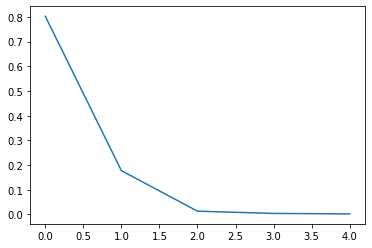

In [117]:
### Apply PCA to X_train
# Import module
from sklearn.decomposition import PCA

# Define the pca object
pca = PCA(n_components = 5)

# Fit the pca to X
pca.fit(X_train)
# Transform the original X to PCs
X_train = pca.transform(X_train)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)

# Display the explained variance ratio
plt.plot(pca.explained_variance_ratio_) 

[0.73984208 0.20727655 0.01921345 0.00605133 0.00234932]


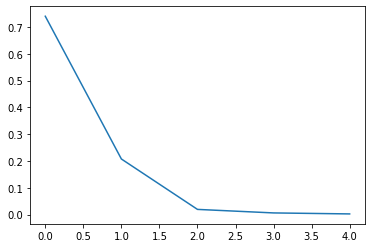

In [118]:
### Apply PCA to X_train
# Import module
from sklearn.decomposition import PCA

# Define the pca object
pca = PCA(n_components = 5)

# Fit the pca to X
pca.fit(X_test)
# Transform the original X to PCs
X_test = pca.transform(X_test)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)

# Display the explained variance ratio
plt.plot(pca.explained_variance_ratio_) 


### Before Model Buidling
* Train the following regression algorithms with hyperparameter tuning. Use the following table for the suggestion of hyperparamters and use 5 as cross validation:

| Model Name                   | Hyperparameter | Suggested values                              |
|------------------------------|----------------|-----------------------------------------------|
|1.Random Forests (RF)         | n_estimators   | 100,200,300,400,500                           |
|                              | criterion      | entropy                                 |
|                              | max_features   | auto, sqrt, log2                              |
|
|2.Decision Tree (DT)          | criterion      | gini, entropy                                 |
|                              | max_features   | auto, sqrt, log2, None                        |
|
|
|3.Support Vector Machine(SVM) | kernel         | rbf, linear, poly                             |
|                              | C              | 2^-5 to 2^10 where the power increases with 1 |
|                              | gamma          | 1, 0.1, 0.01, 0.001, 0.0001                   |
|

### 2. Radom Forest (RF) based Classification (Apply Parameter Tuning)

In [119]:
# Import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [122]:
# Set prameters 
model_RF = RandomForestClassifier()

parameters = {'n_estimators': [100,200,300,400,500],
              'criterion': ['entropy'],
              'max_features': ['auto','sqrt','log2']}


In [124]:
# Define the grid search object
grid = GridSearchCV(estimator = model_RF,
                    param_grid=parameters,
                    cv = 3,
                    n_jobs=-1) # -1 will ensure that all the cores of the processor is being used in parallel mode
# Fit the grid using train set
grid.fit(X_train, y_train)

C:\Users\maitiniyazi.maimaiti\Anaconda3\envs\geo_ml\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [125]:
# Get the cross validation results
grid.cv_results_
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.519578,0.105766,0.059839,0.028220,entropy,auto,100,"{'criterion': 'entropy', 'max_features': 'auto...",0.909091,1.0,1.0,0.969697,0.042855,1
1,0.700784,0.379849,0.081780,0.064464,entropy,auto,200,"{'criterion': 'entropy', 'max_features': 'auto...",0.909091,1.0,1.0,0.969697,0.042855,1
2,0.661473,0.024289,0.048869,0.002936,entropy,auto,300,"{'criterion': 'entropy', 'max_features': 'auto...",0.909091,1.0,1.0,0.969697,0.042855,1
3,2.315885,0.170272,0.160568,0.022316,entropy,auto,400,"{'criterion': 'entropy', 'max_features': 'auto...",0.909091,1.0,1.0,0.969697,0.042855,1
4,2.416175,0.915277,0.187828,0.075522,entropy,auto,500,"{'criterion': 'entropy', 'max_features': 'auto...",0.909091,1.0,1.0,0.969697,0.042855,1
5,0.382306,0.236017,0.036236,0.028690,entropy,sqrt,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.909091,1.0,1.0,0.969697,0.042855,1
6,0.958390,0.371834,0.071807,0.024197,entropy,sqrt,200,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.909091,1.0,1.0,0.969697,0.042855,1
7,0.874615,0.302012,0.054357,0.007544,entropy,sqrt,300,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.909091,1.0,1.0,0.969697,0.042855,1
8,1.461704,0.774561,0.113362,0.068288,entropy,sqrt,400,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.909091,1.0,1.0,0.969697,0.042855,1
9,1.418725,0.383265,0.087432,0.005543,entropy,sqrt,500,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.909091,1.0,1.0,0.969697,0.042855,1


In [126]:
# print best parameter
print(grid.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [127]:
# Get the best model
best_model = grid.best_estimator_

Mode Training accuracy:  1.000
Model Training kappa:  1.000
Model Training f-score:  1.000
[[26  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0  2]]


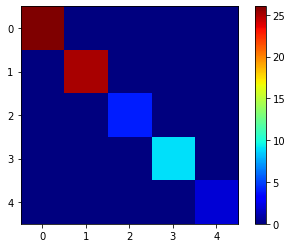

In [128]:
# Evaluate the performance of the model at the Training/calibration phase
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score


y_pred_train = best_model.predict(X_train)

print('Mode Training accuracy: % .3f' % accuracy_score(y_train, y_pred_train))
print('Model Training kappa: % .3f' % cohen_kappa_score(y_train, y_pred_train))
print('Model Training f-score: % .3f' % f1_score(y_train, y_pred_train, average = 'weighted'))
cm_testing = confusion_matrix(y_train, y_pred_train)
print(cm_testing)
plt.imshow(cm_testing,cmap = 'jet')
plt.colorbar()
plt.show()


Mode Testing accuracy:  0.836
Model Testing kappa:  0.752
Model Training f-score:  0.811
[[495   0   0   0   0]
 [ 13 411   0  32  21]
 [  0  72   6   0   0]
 [  0  31   0 155   0]
 [  0  40   0   0   0]]


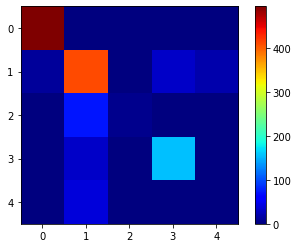

In [129]:
# Evaluate the performance of the model at the Testing phase
y_pred_test = best_model.predict(X_test)

print('Mode Testing accuracy: % .3f' % accuracy_score(y_test, y_pred_test))
print('Model Testing kappa: % .3f' % cohen_kappa_score(y_test, y_pred_test))
print('Model Training f-score: % .3f' % f1_score(y_test, y_pred_test, average = 'weighted'))
cm_testing = confusion_matrix(y_test, y_pred_test)
print(cm_testing)
plt.imshow(cm_testing,cmap = 'jet')
plt.colorbar()
plt.show()

### 3. Apply the best model derived during the training phase and conduct Mapping 

In [63]:
# Load the original HSI image
filepath = r"D:\Teaching\2022Spring\ML_RS_GIS\labs\Lab_5\data\hyper_img.tif"

with rasterio.open(filepath) as src:  
    # Read the entire image
    img = src.read()
    affine = src.transform
    
# swap imagery axis as rows * columns * bands
img = np.moveaxis(img,0,-1)

# print the shape of the HSI image
print(img.shape)


(600, 793, 269)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


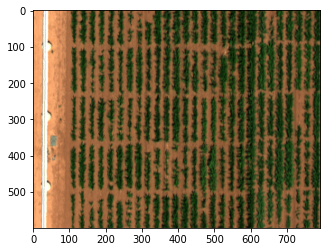

In [70]:
# Display RGB true color image of the HSI image
r = img[:,:,108]
g = img[:,:,68]
b = img[:,:,33]
rgb = np.dstack((r, g, b))*3
plt.imshow(rgb)


In [91]:
img_flat = np.reshape(img,(img.shape[0]*img.shape[1],img.shape[2])) # flatening
img_flat.shape

(475800, 269)

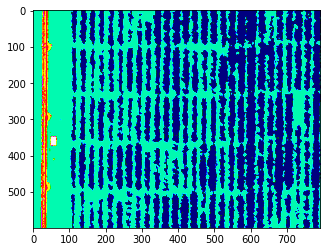

In [108]:
# Apply the best RF model to the orginal image, classify and label each pixel, and display the 2-D label numpy array
# NOTE: for loop approach will work, but is slow

img_flat = np.reshape(img,(img.shape[0]*img.shape[1],img.shape[2])) # flatening
y_pred_img = model_RF.predict(img_flat)
label_map = np.reshape(y_pred_img,(img.shape[0],img.shape[1])) # Convert 1D label to 2D map
plt.imshow(label_map,cmap = 'gist_ncar')
plt.show()


### 4. Apply Decsion Tree (DT) for Classification and Mapping (Apply Parameter Tuning)

### 5. Apply Support Vector Machine for Classification and Mapping (Apply Parameter Tuning)